In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [40]:
train = pd.read_csv('train.csv')
train.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [16]:
train.shape

(245725, 11)

In [21]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [35]:
train['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [36]:
train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

#### We can clearly see that only 11% values are missing and that too in just one feature. and 'No' values ar already high.
#### Therefore, we can just replace these values by 'Yes' to balance the data.

In [98]:
train['Credit_Product'].replace(np.nan,'Yes',inplace=True)

In [99]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [35]:
for feature in train[['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']]:
    categories = train[feature].unique()
    count = len(train[feature].unique())
    print(f' Categories for {feature} are: {categories} and number of categories are {count} \n')

 Categories for Gender are: ['Female' 'Male'] and number of categories are 2 

 Categories for Region_Code are: ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271'] and number of categories are 35 

 Categories for Occupation are: ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] and number of categories are 4 

 Categories for Channel_Code are: ['X3' 'X1' 'X2' 'X4'] and number of categories are 4 

 Categories for Credit_Product are: ['No' nan 'Yes'] and number of categories are 3 

 Categories for Is_Active are: ['No' 'Yes'] and number of categories are 2 



#### Encoding categorical values for the fetaure'Credit product' frst as it has null values.:

In [100]:
train['Credit_Product'] = train['Credit_Product'].map({'Yes':1,'No':0})

In [101]:
train.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,BPAWWXZN,1,51,34,3,2,109,1,1925586,0,0
245721,HFNB7JY8,1,27,18,2,0,15,0,862952,1,0
245722,GEHAUCWT,0,26,31,2,0,13,0,670659,0,0
245723,GE7V8SAH,0,28,23,2,0,31,0,407504,0,0
245724,BOCZSWLJ,1,29,19,2,0,21,0,1129276,0,0


#### Now, we will convert categorical features to numbers depending upon the feature data:
#### We will convert the features 'Gender', 'Is_Active' ,'Region code, 'Channel code' and 'Occupation' using label encoder.

In [102]:
from sklearn.preprocessing import LabelEncoder
lben = LabelEncoder()
columns = ['Gender','Is_Active','Region_Code','Channel_Code','Occupation']
for feature in columns:
    train[feature] = lben.fit_transform(train[feature])

In [103]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0


#### Now all the categorical features have been changed to numerals. We can move forward with scaling the date set.

#### we will now check our data for various distributions, we will use a few features as most fetaures have 0 and 1 values
#### and other have discrete values ranging from 0 to 3.

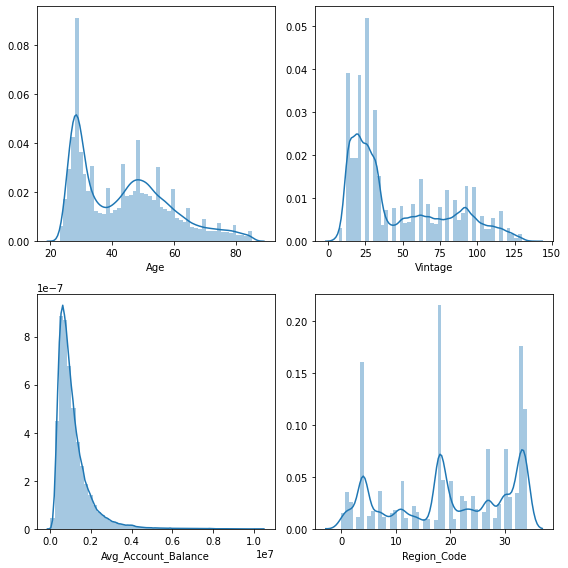

In [88]:
columns = ['Age','Vintage','Avg_Account_Balance','Region_Code']
plt.figure(figsize=(8,8))
plotnumber=1
for feature in columns:
    ax = plt.subplot(2,2,plotnumber)
    sns.distplot(train[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

#### All the above plots can be considered as having left sklewed distributions except for 'Region_Code'  We can work with log transformation for the same.

In [64]:
# Copying the dataset to work with various transformations:
data_1 = train.copy()
data_2 = train.copy()
data_3 = train.copy()

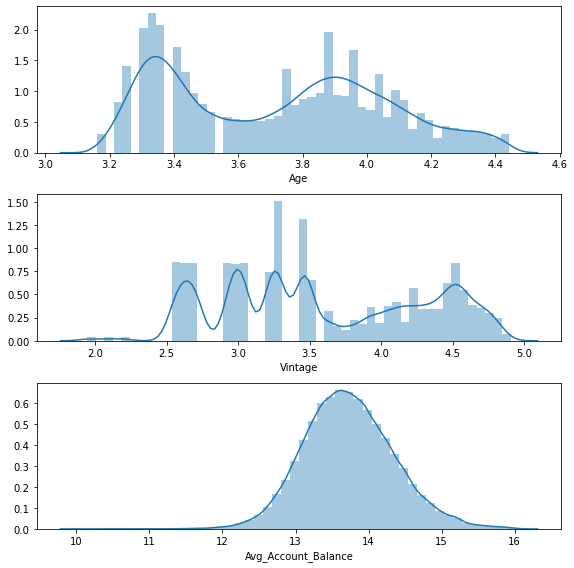

In [58]:
# Checking with log transformation:
columns = ['Age','Vintage','Avg_Account_Balance']
plt.figure(figsize=(8,8))
plotnumber=1
for feature in columns:
    ax = plt.subplot(3,1,plotnumber)
    data_1[feature] = np.log(data_1[feature])
    sns.distplot(data_1[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

####  As we can see that feature 'Avg_account_balance' has been tramsformed into a nice normal distribution whereas Vintage' has been distorted. 'Age' has also been distorted a but not as much as 'Vintage'.

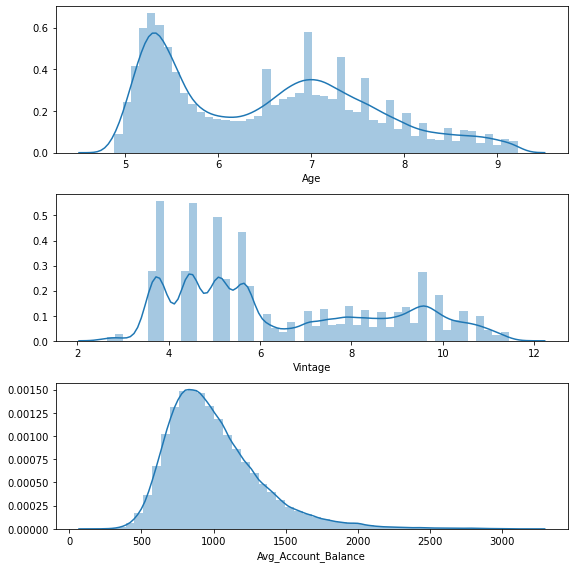

In [65]:
# Checking with square root transformation:
columns = ['Age','Vintage','Avg_Account_Balance']
plt.figure(figsize=(8,8))
plotnumber=1
for feature in columns:
    ax = plt.subplot(3,1,plotnumber)
    data_2[feature] = np.sqrt(data_2[feature])
    sns.distplot(data_2[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

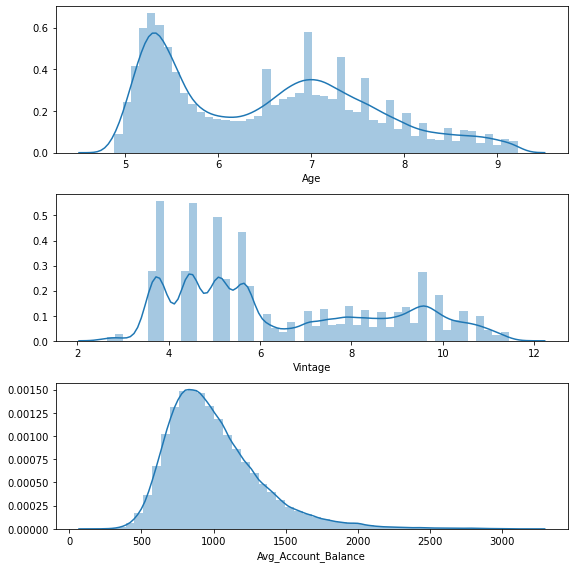

In [66]:
# Checking with Exponential transformation
columns = ['Age','Vintage','Avg_Account_Balance']
plt.figure(figsize=(8,8))
plotnumber=1
for feature in columns:
    ax = plt.subplot(3,1,plotnumber)
    data_3[feature] = data_3[feature]**(1/2)
    sns.distplot(data_3[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

#### As we can see in all the above distributions, 'Age' and 'Vintage' has poor plots as compared to orginal distributions.
#### therefore, we will not use any of the above transformations for these two features and will use the original data.
#### For "Avg_account_balance". log transformation is working the best as it id giving a smooth Gaussian distribution.
#### Aslo, we wil not use Satndardisation/Normalization which I have already tried in the previous submissions because SVC and KNN take and unreasonably longer time and Logistric regression provide a very low ROC_AUC score. So, we will go with the original data and log transformation of "Avg_account_balance' as the algorithms XgBoost and LighGBM do not require scaling.

In [104]:
# Label saperation
X = train.drop(columns=['ID','Is_Lead'],axis=1)
y = train['Is_Lead']

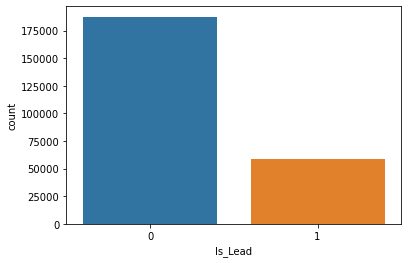

In [105]:
# Checking if the datset is balanced or imbalanced:
sns.countplot(y)
plt.show()

In [106]:
# As we can see that the data in the feature 'Is_Lead' is completely imbalanced.
from tensorflow import keras
from imblearn.over_sampling import RandomOverSampler

In [107]:
sample = RandomOverSampler()
X_sampled,y_sampled = sample.fit_sample(X,y)

In [108]:
X_sampled.shape

(374874, 9)

In [109]:
y_sampled.shape

(374874,)

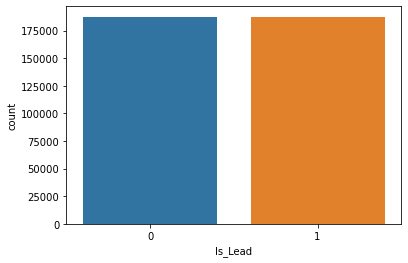

In [110]:
sns.countplot(y_sampled)

In [ ]:
# Now the dataset is balanced

In [111]:
X_sampled.to_csv('X_samp.csv',index=False)

In [112]:
y_sampled.to_csv('y_samp.csv',index=False)

### ML model building:

In [41]:
X_sampled = pd.read_csv('X_samp.csv')
y_sampled = pd.read_csv('y_samp.csv')

In [42]:
X_sampled.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,0,1045696,0
1,0,30,27,2,0,32,0,581988,0
2,0,56,18,3,2,26,0,1484315,1
3,1,34,20,2,0,19,0,470454,0
4,0,30,32,2,0,33,0,886787,0


In [43]:
X_sampled.shape

(374874, 9)

In [5]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.3,random_state=0)

In [5]:
# Performing the standardisation on the dataset:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [6]:
# Tranforming feature 'Avg_account_balance' using log transformation. The transformation is being done after train test split to prevent data leakage
# In this case, there is only feature being transformed, so there won't be much data leakage anyway.
X_train['Avg_Account_Balance'] = np.log(X_train['Avg_Account_Balance'])
X_test['Avg_Account_Balance'] = np.log(X_test['Avg_Account_Balance'])

<ipython-input-6-88aac5a6d25d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Avg_Account_Balance'] = np.log(X_train['Avg_Account_Balance'])
<ipython-input-6-88aac5a6d25d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Avg_Account_Balance'] = np.log(X_test['Avg_Account_Balance'])


In [119]:
X_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
333524,0,50,19,1,2,81,1,13.232979,0
259173,1,57,18,3,1,105,1,14.586275,0
95513,1,49,30,3,1,103,1,12.843239,0
333276,1,58,18,3,2,117,1,13.724313,0
214606,1,39,27,3,1,67,1,12.533421,1


In [92]:
# X_train_scaled = X_train_scaled.iloc[:262411,:]
# X_test_scaled = X_test_scaled.iloc[:112463,:]

In [10]:
# y_train = y_train.iloc[:262411,:]
# y_test = y_test.iloc[:112463,:]

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Logistic Regression:

In [8]:
from sklearn.linear_model import LogisticRegression
import time

In [120]:
lr = LogisticRegression(random_state=42,max_iter=1000)
start = time.time()
lr.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training time: 7.675360679626465s


In [163]:
ytrain_pred = lr.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train,ytrain_pred)
print(f' Training roc_auc score:{roc_auc}')

 Training roc_auc score:0.8252151644990691


In [167]:
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred)
print(f' Test roc_auc score:{roc_auc}')

 Test roc_auc score:0.8235648938180027


#### Random Forest:

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier(n_estimators=300,n_jobs=-1,random_state=0)
start = time.time()
rf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

<ipython-input-125-d9d9e584c2c7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Training time: 80.08286619186401s


In [168]:
ytrain_pred = rf.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train,ytrain_pred)
print(f' Training roc_auc score:{roc_auc}')

 Training roc_auc score:0.9999993114638254


In [170]:
y_pred = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred)
print(f' Test roc_auc score:{roc_auc}')

 Test roc_auc score:0.9724605442429561


#### XgBoost:

In [137]:
from xgboost import XGBClassifier

In [138]:
xgb = XGBClassifier(n_estimators=500,n_jobs=-1)
start = time.time()
xgb.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training time: 89.75494265556335s


In [172]:
ytrain_pred = xgb.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train,ytrain_pred)
print(f' Training roc_auc score:{roc_auc}')

 Training roc_auc score:0.9164158482099953


In [173]:
y_pred = xgb.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,y_pred)
print(f' Test roc_auc score:{roc_auc}')

 Test roc_auc score:0.8814391706149899


#### LightGBM:

In [145]:
pip install lightgbm

In [44]:
from lightgbm import LGBMClassifier

In [154]:
model = LGBMClassifier()
start = time.time()
model.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training time: 3.2802300453186035s


In [155]:
ytrain_pred = model.predict(X_train)
roc_auc = roc_auc_score(y_train,ytrain_pred)
print(f' Training roc_auc score:{roc_auc}')

 Training roc_auc score:0.7944786113137805


In [156]:
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test,y_pred)
print(f' Test roc_auc score:{roc_auc}')

 Test roc_auc score:0.7910278838367736


In [ ]:
####Creating a pickle object and dumpin the model into the same.

In [157]:
import pickle
filename = 'model_stand_lightgbm.pkl'
pickle.dump(model,open(filename,'wb'))

In [132]:
test_scaled_lben = pd.read_csv('test_scaled_lben.csv')

In [134]:
test_scaled_lben.shape

(105312, 9)

In [174]:
y_pred = model.predict_proba(test_scaled_lben)[:,1]

In [175]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission_1.csv')
datasets = pd.concat([sub_df['ID'],pred],axis=1)
datasets.columns = ['ID','Is_Lead']
datasets.to_csv('sample_submission_lightgbm.csv',index=False)

#### After trying all the models, LightGBM is giving the best score till now without any overfitting. Therefore, we will work with best parameters on LightGBM model now.

In [1]:
# checked with various paramters for LGBMClassier and found the following to be best
lgb_params= {'learning_rate': 0.050, 
             'n_estimators': 20000, 
             'max_bin': 96,
             'num_leaves': 11, 
             'max_depth': 26, 
             'reg_alpha': 9, 
             'reg_lambda': 7, 
             'subsample': 0.7}

In [22]:
lgbm_model = LGBMClassifier(n_estimators=2000,max_bin=96,max_depth=26,num_leaves=11,learning_rate=0.050,reg_alpha=9,reg_lambda=7,
                            subsample=0.7,)
start = time.time()
lgbm_model.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training time: 18.321964502334595s


In [23]:
ytrain_pred = lgbm_model.predict(X_train)
roc_auc = roc_auc_score(y_train,ytrain_pred)
print(f' Training roc_auc score:{roc_auc}')

 Training roc_auc score:0.7968712821885698


In [24]:
y_pred = lgbm_model.predict(X_test)
roc_auc = roc_auc_score(y_test,y_pred)
print(f' Test roc_auc score:{roc_auc}')

 Test roc_auc score:0.7916697821389593


#### Dumping the model into pickle:

In [25]:
import pickle
filename = 'model_stand_lightgbm.pkl'
pickle.dump(lgbm_model,open(filename,'wb'))

In [26]:
test_scaled_lben = pd.read_csv('test_scaled_lben.csv')

In [27]:
test_scaled_lben.shape

(105312, 9)

In [28]:
y_pred = lgbm_model.predict_proba(test_scaled_lben)[:,1]

In [29]:
# pred = pd.DataFrame(y_pred)
# sub_df = pd.read_csv('sample_submission_1.csv')
# datasets = pd.concat([sub_df['ID'],pred],axis=1)
# datasets.columns = ['ID','Is_Lead']
# datasets.to_csv('sample_submission_lightgbm.csv',index=False)

In [45]:
# Changing 'Avg_Account_Balance' with log transformation for cross val score.
X_sampled['Avg_Account_Balance'] = np.log(X_sampled['Avg_Account_Balance'])

In [ ]:
#### Using Stratified K fold cross validation to find out the ROC_AUC score. 

In [46]:
# Using K foild cross validation to find out the ROC_AUC score
from sklearn.model_selection import KFold, StratifiedKFold

def cross_val_score(X, y, model, params, folds=11):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=11)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("_____"*10)
    
    return alg

In [47]:
lgb_params= {'learning_rate': 0.050, 
             'n_estimators': 20000, 
             'max_bin': 96,
             'num_leaves': 11, 
             'max_depth': 26, 
             'reg_alpha': 9, 
             'reg_lambda': 7, 
             'subsample': 0.7}

In [48]:
lgb_model_cross_val = cross_val(X_sampled, y_sampled, LGBMClassifier, lgb_params)

Fold: 0


C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.468109
[800]	valid_0's binary_logloss: 0.465733
[1200]	valid_0's binary_logloss: 0.463977
[1600]	valid_0's binary_logloss: 0.462635
[2000]	valid_0's binary_logloss: 0.46146
[2400]	valid_0's binary_logloss: 0.460397
[2800]	valid_0's binary_logloss: 0.459484
[3200]	valid_0's binary_logloss: 0.45869
[3600]	valid_0's binary_logloss: 0.457855
[4000]	valid_0's binary_logloss: 0.457036
[4400]	valid_0's binary_logloss: 0.456217
[4800]	valid_0's binary_logloss: 0.455343
[5200]	valid_0's binary_logloss: 0.454552
[5600]	valid_0's binary_logloss: 0.453699
[6000]	valid_0's binary_logloss: 0.452918
[6400]	valid_0's binary_logloss: 0.452291
[6800]	valid_0's binary_logloss: 0.451772
[7200]	valid_0's binary_logloss: 0.451158
[7600]	valid_0's binary_logloss: 0.45054
[8000]	valid_0's binary_logloss: 0.449875
[8400]	valid_0's binary_logloss: 0.449305
[8800]	valid_0's binary_logloss: 0.44867
[9200]	valid_0's bin

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.475025
[800]	valid_0's binary_logloss: 0.472698
[1200]	valid_0's binary_logloss: 0.470872
[1600]	valid_0's binary_logloss: 0.469525
[2000]	valid_0's binary_logloss: 0.468292
[2400]	valid_0's binary_logloss: 0.467118
[2800]	valid_0's binary_logloss: 0.466174
[3200]	valid_0's binary_logloss: 0.465055
[3600]	valid_0's binary_logloss: 0.464137
[4000]	valid_0's binary_logloss: 0.4633
[4400]	valid_0's binary_logloss: 0.462278
[4800]	valid_0's binary_logloss: 0.461517
[5200]	valid_0's binary_logloss: 0.460727
[5600]	valid_0's binary_logloss: 0.460014
[6000]	valid_0's binary_logloss: 0.459231
[6400]	valid_0's binary_logloss: 0.458513
[6800]	valid_0's binary_logloss: 0.457879
[7200]	valid_0's binary_logloss: 0.457156
[7600]	valid_0's binary_logloss: 0.456408
[8000]	valid_0's binary_logloss: 0.455744
[8400]	valid_0's binary_logloss: 0.455099
[8800]	valid_0's binary_logloss: 0.454417
[9200]	valid_0's b

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.472234
[800]	valid_0's binary_logloss: 0.470128
[1200]	valid_0's binary_logloss: 0.468588
[1600]	valid_0's binary_logloss: 0.467048
[2000]	valid_0's binary_logloss: 0.465782
[2400]	valid_0's binary_logloss: 0.464642
[2800]	valid_0's binary_logloss: 0.463655
[3200]	valid_0's binary_logloss: 0.462746
[3600]	valid_0's binary_logloss: 0.461897
[4000]	valid_0's binary_logloss: 0.461061
[4400]	valid_0's binary_logloss: 0.460347
[4800]	valid_0's binary_logloss: 0.459459
[5200]	valid_0's binary_logloss: 0.458685
[5600]	valid_0's binary_logloss: 0.457887
[6000]	valid_0's binary_logloss: 0.457219
[6400]	valid_0's binary_logloss: 0.456628
[6800]	valid_0's binary_logloss: 0.456045
[7200]	valid_0's binary_logloss: 0.455396
[7600]	valid_0's binary_logloss: 0.454847
[8000]	valid_0's binary_logloss: 0.454263
[8400]	valid_0's binary_logloss: 0.453831
[8800]	valid_0's binary_logloss: 0.45325
[9200]	valid_0's 

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.474377
[800]	valid_0's binary_logloss: 0.47203
[1200]	valid_0's binary_logloss: 0.470494
[1600]	valid_0's binary_logloss: 0.469133
[2000]	valid_0's binary_logloss: 0.467967
[2400]	valid_0's binary_logloss: 0.466935
[2800]	valid_0's binary_logloss: 0.465936
[3200]	valid_0's binary_logloss: 0.464777
[3600]	valid_0's binary_logloss: 0.463752
[4000]	valid_0's binary_logloss: 0.462868
[4400]	valid_0's binary_logloss: 0.462002
[4800]	valid_0's binary_logloss: 0.46122
[5200]	valid_0's binary_logloss: 0.460471
[5600]	valid_0's binary_logloss: 0.459704
[6000]	valid_0's binary_logloss: 0.458987
[6400]	valid_0's binary_logloss: 0.45828
[6800]	valid_0's binary_logloss: 0.457624
[7200]	valid_0's binary_logloss: 0.457005
[7600]	valid_0's binary_logloss: 0.456347
[8000]	valid_0's binary_logloss: 0.455666
[8400]	valid_0's binary_logloss: 0.455084
[8800]	valid_0's binary_logloss: 0.454523
[9200]	valid_0's bi

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.468116
[800]	valid_0's binary_logloss: 0.465893
[1200]	valid_0's binary_logloss: 0.464506
[1600]	valid_0's binary_logloss: 0.463316
[2000]	valid_0's binary_logloss: 0.462116
[2400]	valid_0's binary_logloss: 0.461069
[2800]	valid_0's binary_logloss: 0.46012
[3200]	valid_0's binary_logloss: 0.459141
[3600]	valid_0's binary_logloss: 0.458195
[4000]	valid_0's binary_logloss: 0.457369
[4400]	valid_0's binary_logloss: 0.456575
[4800]	valid_0's binary_logloss: 0.455677
[5200]	valid_0's binary_logloss: 0.454939
[5600]	valid_0's binary_logloss: 0.454096
[6000]	valid_0's binary_logloss: 0.453269
[6400]	valid_0's binary_logloss: 0.452567
[6800]	valid_0's binary_logloss: 0.451849
[7200]	valid_0's binary_logloss: 0.4512
[7600]	valid_0's binary_logloss: 0.450587
[8000]	valid_0's binary_logloss: 0.449947
[8400]	valid_0's binary_logloss: 0.449375
[8800]	valid_0's binary_logloss: 0.448754
[9200]	valid_0's bi

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.477386
[800]	valid_0's binary_logloss: 0.475333
[1200]	valid_0's binary_logloss: 0.473741
[1600]	valid_0's binary_logloss: 0.472272
[2000]	valid_0's binary_logloss: 0.471193
[2400]	valid_0's binary_logloss: 0.470205
[2800]	valid_0's binary_logloss: 0.469353
[3200]	valid_0's binary_logloss: 0.468329
[3600]	valid_0's binary_logloss: 0.467535
[4000]	valid_0's binary_logloss: 0.466729
[4400]	valid_0's binary_logloss: 0.465947
[4800]	valid_0's binary_logloss: 0.46502
[5200]	valid_0's binary_logloss: 0.464081
[5600]	valid_0's binary_logloss: 0.463221
[6000]	valid_0's binary_logloss: 0.462368
[6400]	valid_0's binary_logloss: 0.461566
[6800]	valid_0's binary_logloss: 0.460788
[7200]	valid_0's binary_logloss: 0.460164
[7600]	valid_0's binary_logloss: 0.459551
[8000]	valid_0's binary_logloss: 0.458787
[8400]	valid_0's binary_logloss: 0.458165
[8800]	valid_0's binary_logloss: 0.457614
[9200]	valid_0's 

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.471773
[800]	valid_0's binary_logloss: 0.469824
[1200]	valid_0's binary_logloss: 0.468327
[1600]	valid_0's binary_logloss: 0.467261
[2000]	valid_0's binary_logloss: 0.465997
[2400]	valid_0's binary_logloss: 0.464706
[2800]	valid_0's binary_logloss: 0.46369
[3200]	valid_0's binary_logloss: 0.462669
[3600]	valid_0's binary_logloss: 0.46184
[4000]	valid_0's binary_logloss: 0.461115
[4400]	valid_0's binary_logloss: 0.460168
[4800]	valid_0's binary_logloss: 0.45946
[5200]	valid_0's binary_logloss: 0.458777
[5600]	valid_0's binary_logloss: 0.45803
[6000]	valid_0's binary_logloss: 0.457339
[6400]	valid_0's binary_logloss: 0.456651
[6800]	valid_0's binary_logloss: 0.456087
[7200]	valid_0's binary_logloss: 0.455363
[7600]	valid_0's binary_logloss: 0.454695
[8000]	valid_0's binary_logloss: 0.454059
[8400]	valid_0's binary_logloss: 0.453486
[8800]	valid_0's binary_logloss: 0.452931
[9200]	valid_0's bin

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.465652
[800]	valid_0's binary_logloss: 0.463358
[1200]	valid_0's binary_logloss: 0.462018
[1600]	valid_0's binary_logloss: 0.460693
[2000]	valid_0's binary_logloss: 0.459382
[2400]	valid_0's binary_logloss: 0.458154
[2800]	valid_0's binary_logloss: 0.457186
[3200]	valid_0's binary_logloss: 0.45632
[3600]	valid_0's binary_logloss: 0.455334
[4000]	valid_0's binary_logloss: 0.454416
[4400]	valid_0's binary_logloss: 0.453705
[4800]	valid_0's binary_logloss: 0.452875
[5200]	valid_0's binary_logloss: 0.452093
[5600]	valid_0's binary_logloss: 0.451368
[6000]	valid_0's binary_logloss: 0.450676
[6400]	valid_0's binary_logloss: 0.449926
[6800]	valid_0's binary_logloss: 0.449193
[7200]	valid_0's binary_logloss: 0.448482
[7600]	valid_0's binary_logloss: 0.447865
[8000]	valid_0's binary_logloss: 0.447321
[8400]	valid_0's binary_logloss: 0.446671
[8800]	valid_0's binary_logloss: 0.446045
[9200]	valid_0's 

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.473204
[800]	valid_0's binary_logloss: 0.470949
[1200]	valid_0's binary_logloss: 0.469077
[1600]	valid_0's binary_logloss: 0.46771
[2000]	valid_0's binary_logloss: 0.466577
[2400]	valid_0's binary_logloss: 0.465518
[2800]	valid_0's binary_logloss: 0.464312
[3200]	valid_0's binary_logloss: 0.463298
[3600]	valid_0's binary_logloss: 0.462328
[4000]	valid_0's binary_logloss: 0.461427
[4400]	valid_0's binary_logloss: 0.460588
[4800]	valid_0's binary_logloss: 0.459829
[5200]	valid_0's binary_logloss: 0.459061
[5600]	valid_0's binary_logloss: 0.458373
[6000]	valid_0's binary_logloss: 0.457608
[6400]	valid_0's binary_logloss: 0.456962
[6800]	valid_0's binary_logloss: 0.456242
[7200]	valid_0's binary_logloss: 0.455548
[7600]	valid_0's binary_logloss: 0.454951
[8000]	valid_0's binary_logloss: 0.45434
[8400]	valid_0's binary_logloss: 0.453626
[8800]	valid_0's binary_logloss: 0.452987
[9200]	valid_0's b

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.471395
[800]	valid_0's binary_logloss: 0.469515
[1200]	valid_0's binary_logloss: 0.468008
[1600]	valid_0's binary_logloss: 0.466687
[2000]	valid_0's binary_logloss: 0.465406
[2400]	valid_0's binary_logloss: 0.464397
[2800]	valid_0's binary_logloss: 0.463388
[3200]	valid_0's binary_logloss: 0.462416
[3600]	valid_0's binary_logloss: 0.461614
[4000]	valid_0's binary_logloss: 0.460715
[4400]	valid_0's binary_logloss: 0.459966
[4800]	valid_0's binary_logloss: 0.459157
[5200]	valid_0's binary_logloss: 0.458406
[5600]	valid_0's binary_logloss: 0.457628
[6000]	valid_0's binary_logloss: 0.456796
[6400]	valid_0's binary_logloss: 0.455956
[6800]	valid_0's binary_logloss: 0.455104
[7200]	valid_0's binary_logloss: 0.454413
[7600]	valid_0's binary_logloss: 0.453804
[8000]	valid_0's binary_logloss: 0.453122
[8400]	valid_0's binary_logloss: 0.45244
[8800]	valid_0's binary_logloss: 0.451923
[9200]	valid_0's 

C:\Users\Sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.472406
[800]	valid_0's binary_logloss: 0.470114
[1200]	valid_0's binary_logloss: 0.468469
[1600]	valid_0's binary_logloss: 0.467173
[2000]	valid_0's binary_logloss: 0.46591
[2400]	valid_0's binary_logloss: 0.464838
[2800]	valid_0's binary_logloss: 0.463854
[3200]	valid_0's binary_logloss: 0.462904
[3600]	valid_0's binary_logloss: 0.461985
[4000]	valid_0's binary_logloss: 0.460975
[4400]	valid_0's binary_logloss: 0.460043
[4800]	valid_0's binary_logloss: 0.45925
[5200]	valid_0's binary_logloss: 0.458557
[5600]	valid_0's binary_logloss: 0.457785
[6000]	valid_0's binary_logloss: 0.457081
[6400]	valid_0's binary_logloss: 0.456392
[6800]	valid_0's binary_logloss: 0.455819
[7200]	valid_0's binary_logloss: 0.455159
[7600]	valid_0's binary_logloss: 0.454484
[8000]	valid_0's binary_logloss: 0.453837
[8400]	valid_0's binary_logloss: 0.453258
[8800]	valid_0's binary_logloss: 0.452763
[9200]	valid_0's b

In [49]:
y_pred_cross_val = lgb_model_cross_val.predict_proba(test_scaled_lben)[:,1]

In [50]:
pred = pd.DataFrame(y_pred_cross_val)
sub_df = pd.read_csv('sample_submission_1.csv')
datasets = pd.concat([sub_df['ID'],pred],axis=1)
datasets.columns = ['ID','Is_Lead']
datasets.to_csv('sample_submission_lightgbm_cross_val.csv',index=False)